# DATA SCIENCE WITH PYTHON  REPORT COVID-19 

We use data from the files at https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

Thank you @CSSEGISandData for providing the data!

# Data Visualization COVID-19

In [1]:
from IPython.display import IFrame
IFrame('https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6', height=700, width=960)

# Data Analaysis COVID-19 Report i Data Science with Python

In [2]:
%config InlineBackend.figure_formats = ['svg']
import math
from numpy import log, exp
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
figsize = (11, 4)   # need bigger size otherwise xlabels are cut-off in svg files

import os
import pandas as pd
import seaborn as sb
sb.set_style('darkgrid')
import scipy
import numpy as np
import iminuit

base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"

def string_to_date(input_):
    """Converts string of type 01/22/02 [for 22 Jan 2020] into datetime object"""
    # return pd.to_datetime(input_, format='%m/%d/%y', errors='ignore')
    return pd.to_datetime(input_, format='%m/%d/%y')

def set_date_formatting(ax):
    ax.xaxis.set_major_locator(matplotlib.dates.DayLocator())
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
    ax.tick_params(axis='x', rotation=90)

# read data from web
#

def fetch_data(names = ['confirmed', 'deaths']):
    """Return 3 data frames:
    [confirmed, deaths], location_info
    
    where confirmed, deaths and recovered are data frames with countries/regions in the rows, and 
    days in the columns
    
    and location_info provides additional information about the locations.
    
    We assume all three tables have the same entries"""
    location_info = pd.DataFrame()
    dfs = []
    for name in names:
        url = os.path.join(base_url, "time_series_covid19_" + name + "_global.csv")
        df = pd.read_csv(url, index_col=1)
    
        if not name == 'Recovered':
            location_info['Lat'] = df['Lat']
            location_info['Long'] = df['Long']
            location_info['Province/State'] = df['Province/State']
            location_info['location'] = df.index + "-" + df['Province/State']
        else:
            pass  # no location info in recovered since 14 March
        ## df = df.drop(labels=["Lat", "Long", "Province/State"], axis=1)
        df = df.drop(labels=["Lat", "Long"], axis=1)
        
        # extract dates from strings
        dates = string_to_date(df.columns[1:])        
        # use those objects as new column labels
        df.columns = [df.columns[0]] + list(dates)
        print(f"{name:10}: last data point from {max(dates[1:])}")
        # dfs.append([df, location_info)
        dfs.append(df)

    return dfs


confirmed, deaths = fetch_data()

# show counries with mosth deaths
deaths.sort_values(by=deaths.columns[-1], ascending=False).iloc[0:10,-8:]

confirmed : last data point from 2020-04-12 00:00:00
deaths    : last data point from 2020-04-12 00:00:00


2020-04-05 00:00:00  2020-04-06 00:00:00  2020-04-07 00:00:00  \
Country/Region                                                                  
US                             9619                10783                12722   
Italy                         15887                16523                17127   
Spain                         12641                13341                14045   
France                         8078                 8911                10328   
United Kingdom                 4934                 5373                 6159   
Iran                           3603                 3739                 3872   
Belgium                        1447                 1632                 2035   
China                          3210                 3212                 3212   
Germany                        1584                 1810                 2016   
Netherlands                    1766                 1867                 2101   

                2020-04-08 00:00:00  2020-04-09 00:00:00  2020-04-10 00:00:00  \
Country/Region                                                                  
US                            14695                16478                18586   
Italy                         17669                18279                18849   
Spain                         14792                15447                16081   
France                        10869                12210                13197   
United Kingdom                 7097                 7978                 8958   
Iran                           3993                 4110                 4232   
Belgium                        2240                 2523                 3019   
China                          3213                 3215                 3216   
Germany                        2349                 2607                 2767   
Netherlands                    2248                 2396                 2511   

                2020-04-11 00:00:00  2020-04-12 00:00:00  
Country/Region                                            
US                            20463                22020  
Italy                         19468                19899  
Spain                         16606                17209  
France                        13832                14393  
United Kingdom                 9875                10612  
Iran                           4357                 4474  
Belgium                        3346                 3600  
China                          3219                 3219  
Germany                        2736                 3022  
Netherlands                    2643                 2737

In [3]:
deaths.sort_values(by=deaths.columns[-1], ascending=False).iloc[:,-8:]


2020-04-05 00:00:00  2020-04-06 00:00:00  2020-04-07 00:00:00  \
Country/Region                                                                  
US                             9619                10783                12722   
Italy                         15887                16523                17127   
Spain                         12641                13341                14045   
France                         8078                 8911                10328   
United Kingdom                 4934                 5373                 6159   
...                             ...                  ...                  ...   
China                             0                    0                    0   
Fiji                              0                    0                    0   
Vietnam                           0                    0                    0   
Maldives                          0                    0                    0   
Yemen                             0                    0                    0   

                2020-04-08 00:00:00  2020-04-09 00:00:00  2020-04-10 00:00:00  \
Country/Region                                                                  
US                            14695                16478                18586   
Italy                         17669                18279                18849   
Spain                         14792                15447                16081   
France                        10869                12210                13197   
United Kingdom                 7097                 7978                 8958   
...                             ...                  ...                  ...   
China                             0                    0                    0   
Fiji                              0                    0                    0   
Vietnam                           0                    0                    0   
Maldives                          0                    0                    0   
Yemen                             0                    0                    0   

                2020-04-11 00:00:00  2020-04-12 00:00:00  
Country/Region                                            
US                            20463                22020  
Italy                         19468                19899  
Spain                         16606                17209  
France                        13832                14393  
United Kingdom                 9875                10612  
...                             ...                  ...  
China                             0                    0  
Fiji                              0                    0  
Vietnam                           0                    0  
Maldives                          0                    0  
Yemen                             0                    0  

[264 rows x 8 columns]

In [4]:
def double_time_exponential(t1, t2, q1, q2):
    return (t2 - t1) * (log(2) / log(q2/q1) )

def growth_rate(double_time):
    return log(2)/double_time

def double_time(growth_rate):
    return log(2)/growth_rate


# t1, t2, q1, q2 = 0, 1, 1, 2
# double_time_exponential(t1, t2, q1, q2), growth_rate(double_time_exponential(t1, t2, q1, q2) )

def double_time_exponential(q2_div_q1, t2_minus_t1=None):
    # print(f"double_time_exponential: {q2_div_q1}, {t2_minus_t1} ")
    if t2_minus_t1 is None:
        t2_minus_t1 = np.ones(q2_div_q1.shape)
        # print(f"shape t: {t2_minus_t1.shape}, shape q: {q2_div_q1.shape}")
        # print(f"type t: {type(t2_minus_t1)}, type q: {type(q2_div_q1.shape)}")

    return t2_minus_t1 * np.log(2) / np.log(q2_div_q1) 


def stack_country(country = "Germany"):

    #create one DataFrame for country/region
    c_df = pd.DataFrame()
    if country == "United Kingdom":
        # UK has many provinces that keep changing. Sum to get all (most relevant is mainland UK)
        c_df['confirmed'] = confirmed.loc[country].sum()
        c_df['deaths'] = deaths.loc[country].sum()
    elif country == "China": 
        # Use only Hubei province
        tmp = confirmed.loc[country]
        c_df['confirmed'] = tmp[tmp['Province/State'] == "Hubei"].T['China']
        tmp = deaths.loc[country]
        c_df['deaths'] = tmp[tmp['Province/State'] == "Hubei"].T['China']
        c_df.drop("Province/State", inplace=True)
    elif country in ['France']:
        c_df['confirmed'] = confirmed.loc[country].sum()
        c_df['deaths'] = deaths.loc[country].sum()
        c_df.drop('Province/State', inplace=True)
    elif country in ['US']:
        c_df['confirmed'] = confirmed.loc[country]
        c_df['deaths'] = deaths.loc[country]
    else:
        c_df['confirmed'] = confirmed.loc[country].drop('Province/State')
        c_df['deaths'] = deaths.loc[country].drop('Province/State')

    # drop days with confirmed cases = 0
    c1 = c_df[c_df['confirmed'] != 0][1:]
    
    # drop another row
    c_df = c1
  
    c_df.index = string_to_date(c_df.index)
    c_df.country = country  # remember which country we work on, just in case
    
    c_df['days-td'] = c_df.index - c_df.index.min()  # days as TimeDelta type
    c_df['days'] = c_df['days-td'].astype("timedelta64[D]").astype(float)
    
    c_df['new_confirmed'] = c_df['confirmed'].diff()
    c_df['new_deaths'] = c_df['deaths'].diff()
    
    c_df['confirmed_pct'] = c_df['confirmed'].pct_change()+1
    c_df['deaths_pct'] = c_df['deaths'].pct_change()+1
    
    #return c_df
    # growth rate
    c_df['deaths_double_time'] = double_time_exponential(c_df['deaths_pct'].values)
    c_df['confirmed_double_time'] = double_time_exponential(c_df['confirmed_pct'].values)
    c_df['deaths_growth_rate'] = growth_rate(c_df['deaths_double_time'].values)
    c_df['confirmed_growth_rate'] = growth_rate(c_df['confirmed_double_time'].values)

    return c_df

In [5]:
import warnings
warnings.filterwarnings('ignore')
c = stack_country("Germany")
#c.tail(n=5)
c2 = stack_country("United Kingdom")
#c.tail(n=5)
#c2 = stack_country("Spain")
#c.tail(n=5)
c2 = stack_country("Italy")
#c2.tail(n=5)
#c2 = stack_country("France")
#c2.tail(n=5)
c2 = stack_country("China")
#c2.tail(n=5)
#c2 = stack_country("US")

c

confirmed deaths days-td  days new_confirmed new_deaths  \
2020-01-28         4      0  0 days   0.0           NaN        NaN   
2020-01-29         4      0  1 days   1.0             0          0   
2020-01-30         4      0  2 days   2.0             0          0   
2020-01-31         5      0  3 days   3.0             1          0   
2020-02-01         8      0  4 days   4.0             3          0   
...              ...    ...     ...   ...           ...        ...   
2020-04-08    113296   2349 71 days  71.0          5633        333   
2020-04-09    118181   2607 72 days  72.0          4885        258   
2020-04-10    122171   2767 73 days  73.0          3990        160   
2020-04-11    124908   2736 74 days  74.0          2737        -31   
2020-04-12    127854   3022 75 days  75.0          2946        286   

            confirmed_pct  deaths_pct  deaths_double_time  \
2020-01-28            NaN         NaN                 NaN   
2020-01-29       1.000000         NaN                 NaN   
2020-01-30       1.000000         NaN                 NaN   
2020-01-31       1.250000         NaN                 NaN   
2020-02-01       1.600000         NaN                 NaN   
...                   ...         ...                 ...   
2020-04-08       1.052321    1.165179            4.534097   
2020-04-09       1.043117    1.109834            6.651419   
2020-04-10       1.033762    1.061373           11.637100   
2020-04-11       1.022403    0.988797          -61.521751   
2020-04-12       1.023585    1.104532            6.971778   

            confirmed_double_time  deaths_growth_rate  confirmed_growth_rate  
2020-01-28                    NaN                 NaN                    NaN  
2020-01-29                    inf                 NaN               0.000000  
2020-01-30                    inf                 NaN               0.000000  
2020-01-31               3.106284                 NaN               0.223144  
2020-02-01               1.474770                 NaN               0.470004  
...                           ...                 ...                    ...  
2020-04-08              13.591685            0.152874               0.050998  
2020-04-09              16.420042            0.104210               0.042213  
2020-04-10              20.875189            0.059564               0.033204  
2020-04-11              31.285186           -0.011267               0.022156  
2020-04-12              29.734103            0.099422               0.023312  

[76 rows x 12 columns]

In [6]:
confirmed.loc["US"]

Province/State            NaN
2020-01-22 00:00:00         1
2020-01-23 00:00:00         1
2020-01-24 00:00:00         2
2020-01-25 00:00:00         2
                        ...  
2020-04-08 00:00:00    429052
2020-04-09 00:00:00    461437
2020-04-10 00:00:00    496535
2020-04-11 00:00:00    526396
2020-04-12 00:00:00    555313
Name: US, Length: 83, dtype: object

In [7]:
def overview_plot(c_df, rollingwindow=7):
    """expect """
    fig, axes = plt.subplots(4, 1, figsize=(8, 14))
    ax = axes[0]
    set_date_formatting(ax)
    ax.plot(c_df.index, c_df['confirmed'], '-b', label='confirmed')
    ax.plot(c_df.index, c_df['deaths'], '-r', label='deaths')
    ax.legend(loc='center left')
    country = c_df.country
    ax.set_title(country + " accumulated data")
    ax.set_yscale('log')

    ax = axes[1]
    set_date_formatting(ax)
    ax.plot(c_df.index, c_df['confirmed'].diff(), 'ob', label='day-to-day change confirmed')
    ax.plot(c_df.index, c_df['deaths'].diff(), 'xr', label='day-to-day change deaths')
    ax.legend(loc='center left')
    #ax.set_yscale('log')
    

    ax = axes[2]
    set_date_formatting(ax)
    ax.plot(c_df.index, c_df['deaths_double_time'], 'xr', label='double time deaths')
    ax.plot(c_df.index, c_df['deaths_double_time'].rolling(rollingwindow, center=True).mean(),
            '-r', label='double time deaths rolling')
    ax.plot(c_df.index, c_df['confirmed_double_time'], 'ob', label='double time confirmed')
    ax.plot(c_df.index, c_df['confirmed_double_time'].rolling(rollingwindow, center=True).mean(), 
            '-b', label='double time confirmed rolling')
    ax.legend(loc='center left')
    ax.set_ylabel('days to double numbers \n bigger is better')
    maxy = min(20, max(c_df['confirmed_double_time']))
    ax.set_ylim(0, maxy)

    ax = axes[3]
    set_date_formatting(ax)
    ax.plot(c_df.index, c_df['deaths_growth_rate'], 'xr', label='growth rate deaths')
    ax.plot(c_df.index, c_df['deaths_growth_rate'].rolling(rollingwindow, center=True).mean(), 'r-', label='growth rate deaths rolling')
    ax.plot(c_df.index, c_df['confirmed_growth_rate'], 'ob', label='confirmed growth rate')
    ax.plot(c_df.index, c_df['confirmed_growth_rate'].rolling(rollingwindow, center=True).mean(), 
            'b-', label='confirmed growth rate rolling')
    ax.legend(loc='center left')
    ax.set_ylim(0, 0.5)
    ax.set_ylabel('growth rate r in\n f(t) = exp(r*t)\n(smaller is better)')
    
    # fig.savefig(f"figures/{country}-overview.svg")
    return axes

In [8]:
import warnings
warnings.filterwarnings('ignore')
china = stack_country('China')
germany = stack_country('Germany')
uk = stack_country("United Kingdom")
us = stack_country("US")
italy = stack_country("Italy")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10894add0>,
      dtype=object)

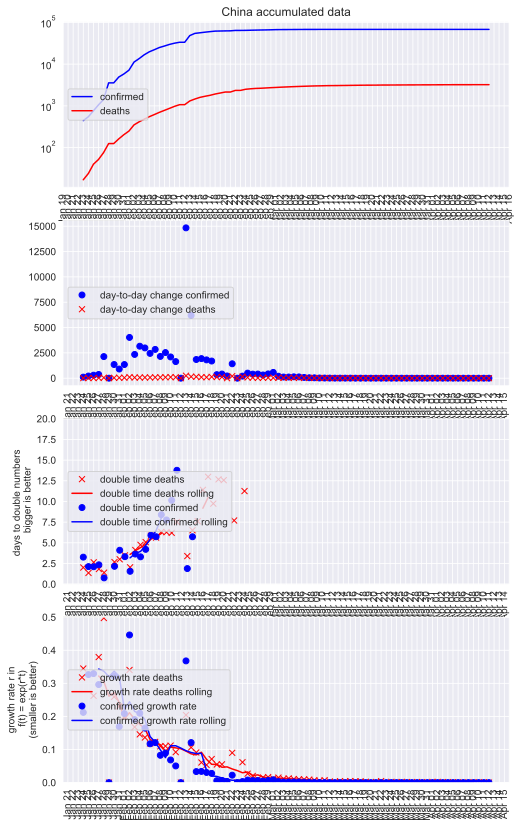

In [9]:
overview_plot(china)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12261da10>,
      dtype=object)

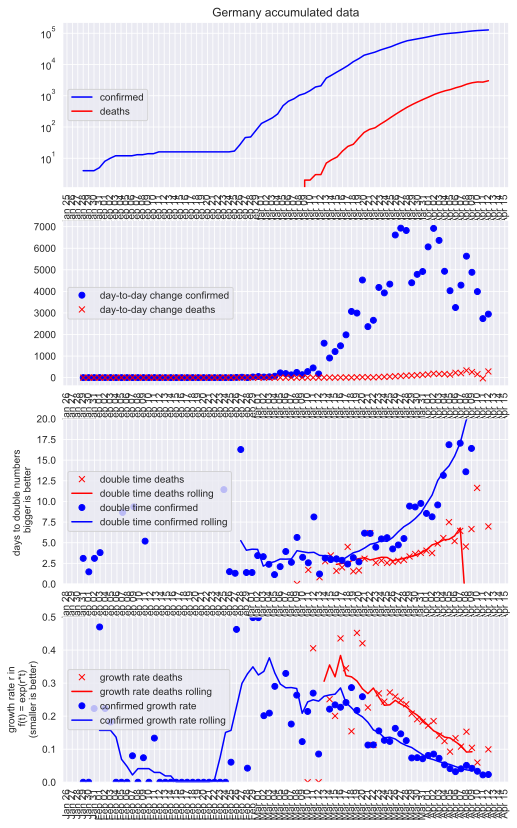

In [10]:
overview_plot(germany)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x122da6110>,
      dtype=object)

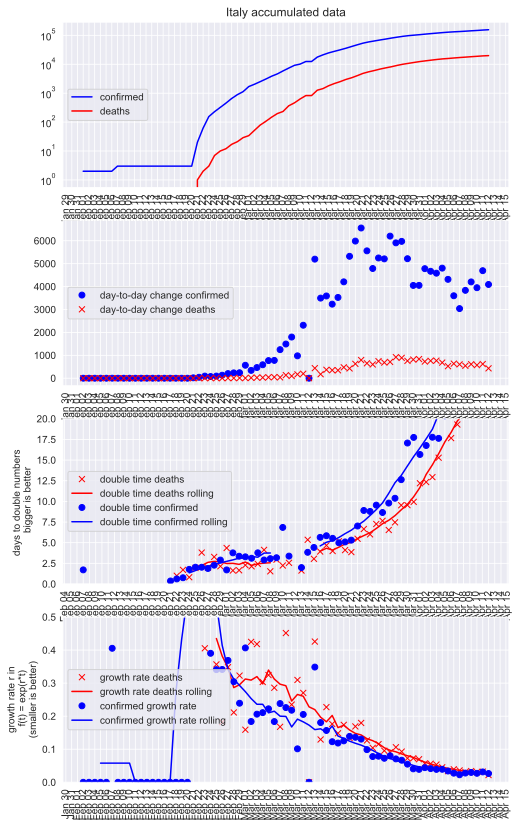

In [11]:
overview_plot(italy)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x123ea8250>,
      dtype=object)

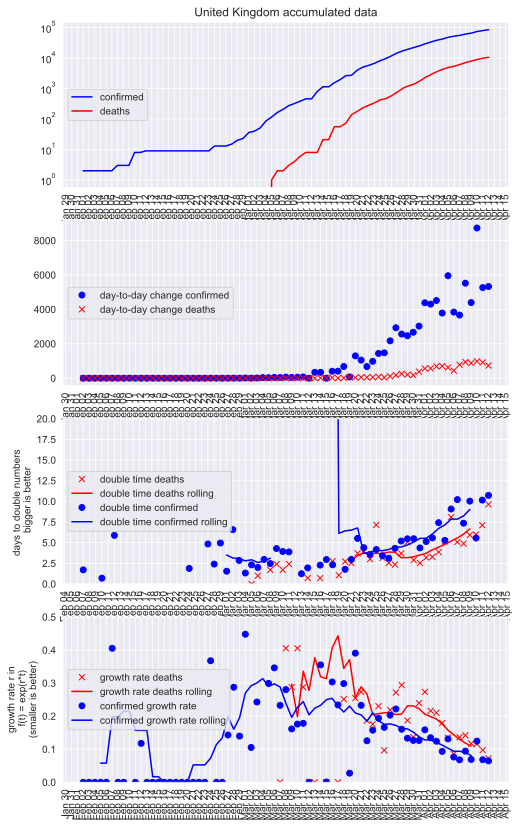

In [12]:
overview_plot(uk)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x124670910>,
      dtype=object)

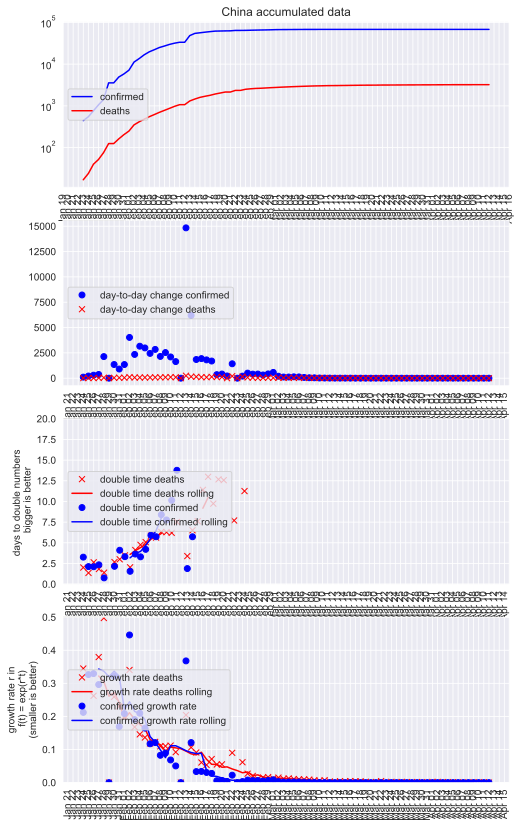

In [13]:
c = stack_country('China')
overview_plot(c)

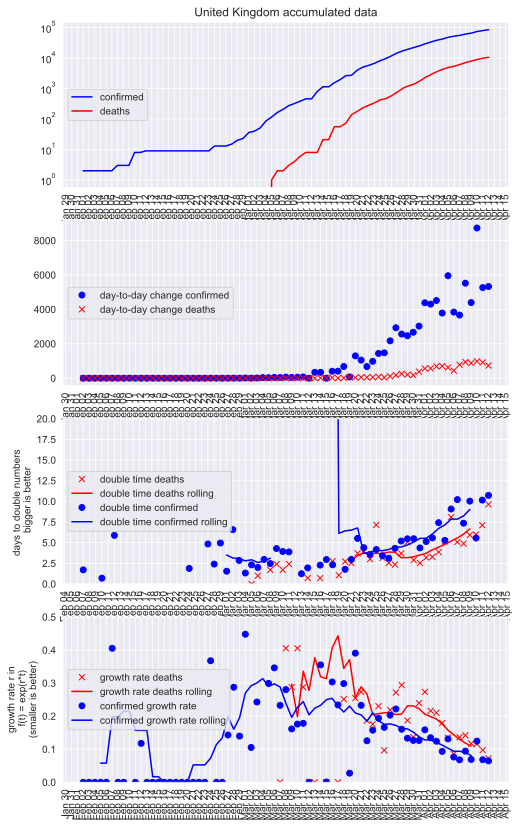

In [14]:
uk = stack_country('United Kingdom')
overview_plot(uk);

In [15]:
# compute doubling time (and growth rate) for a longer sequence of days (by fitting)


reduced chi^2: 0.44318200455700174
r   : 0.0984
t0  : -0.0544
a0  : 2.55



------------------------------------------------------------------
| FCN = 0.4432                  |      Ncalls=53 (53 total)      |
| EDM = 7.38E-05 (Goal: 0.0002) |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | r    |   0.10    |   0.07    |            |            |         |         |       |
| 1 | t0   |   -0.05   |   23.20   |            |            |         |         |       |
| 2 | a0   |    2.6    |    4.6    |            |            |         |         |       |
------------------------------------------------------------------------------------------

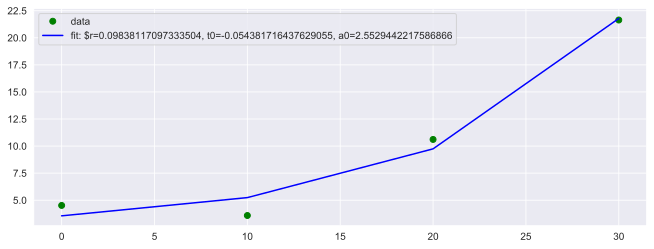

In [16]:
def pretty_params(**par):
    end='\n'
    s = ""
    for p in par:
        s += f"{p:3} : {par[p]:.3g}" + end
    return s


def model(xdata, r, t0, a0):
    return np.exp(r*(xdata-t0))+a0



def exp_fit(xdata, ydata, p0):
    r, t0, a0 = p0
    
    def least_squares(r, t0, a0):
        yvar = 10
        return sum((ydata - model(xdata, r, t0, a0))**2)/yvar
    
    m = iminuit.Minuit(least_squares, 
                       r=r, t0=t0, a0=a0, error_r=0.02, error_t0=0.2, error_a0=1, 
                       errordef=1)
    res = m.migrad()
    print(f"reduced chi^2: {m.fval / (len(ydata) - 3)}")
    r, t0, a0 = m.np_values()
    print(pretty_params(r=r, t0=t0, a0=a0))
    
    return m, res

def plot(xdata, ydata, r, t0, a0, annotate=""):
    #r, t0, a0 = m.np_values()

    fitted = model(xdata, r, t0, a0)
    
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(xdata, ydata, 'og')
    ax.plot(xdata, fitted, '-b')
    ax.legend(["data", f"fit: $r={r}, t0={t0}, a0={a0}"])
    #ax.set_title(f"Infections $n(t)$ ({pretty_params(param_infections, end=', ')})")
    ax.set_title(annotate)
    #ax.xaxis.set_major_locator(matplotlib.dates.DayLocator())
    #ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
    #ax.tick_params(axis='x', rotation=90)
    #fig.savefig('figures/infections-with-model-fit.svg')
    # print(fitted_infections)
    return ax

def test_model(): 
    xdata = np.linspace(0, 30, 4)
    ydata = 0 + np.exp(0.1*(xdata - 0)) + 5*np.random.random_sample(xdata.shape)    
    m, res = exp_fit(xdata, ydata, (.1, 0.00, 0.0))
    r, t0, a0 = m.np_values()
    plot(xdata, ydata, r, t0, a0)
    return res, m, xdata, ydata


res, m, xdata, ydata = test_model()
res


reduced chi^2: 0.009592056396804364
r   : 0.0261
t0  : 49
a0  : 6.78e+04

Double time: 26.6 days


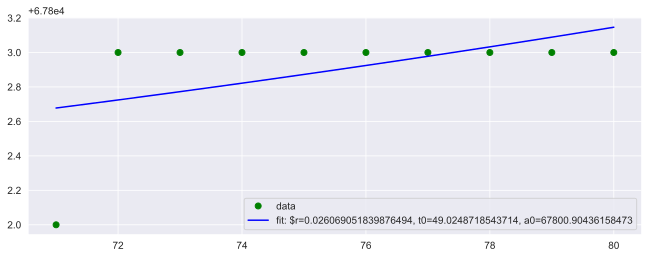

In [17]:
# Exponential fit through last n days
series = c['confirmed']
start = -10
end = None
xdata_0 = (series.index[start:end] - series.index[0])
xdata = np.array((xdata_0.astype("timedelta64[D]").astype(float)))
ydata = series.values[start:end]
# Attempt fit
m, res = exp_fit(xdata, ydata, (.1, 0.00, 0.0))
r, t0, a0 = m.np_values()
plot(xdata, ydata, r, t0, a0)
print(f"Double time: {double_time(r):.1f} days")


reduced chi^2: 0.19542044985884938
r   : 0.0119
t0  : -338
a0  : 3.08e+03

Double time: 58.4 days


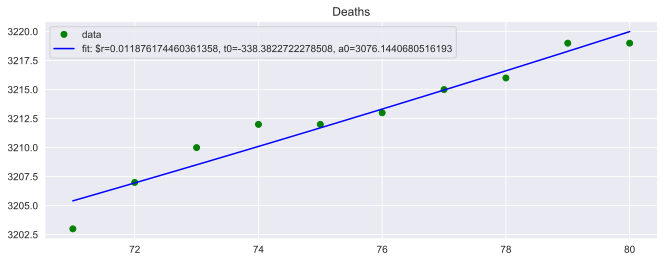

In [18]:
# Exponential fit through last n days, deaths
series = c['deaths']
start = -10
end = None
xdata_0 = (series.index[start:end] - series.index[0])
xdata = np.array((xdata_0.astype("timedelta64[D]").astype(float)))
ydata = series.values[start:end]
# Attempt fit
m, res = exp_fit(xdata, ydata, (.1, 0.00, 0.0))
r, t0, a0 = m.np_values()
ax = plot(xdata, ydata, r, t0, a0)
ax.set_title("Deaths")
print(f"Double time: {double_time(r):.1f} days")


In [19]:
def grow_rate_n_days(series, n=7):
    """Use the last 4 data points to estimate growth rate (and doubling time) for each day"""
    par = pd.DataFrame(index=series.index, columns=['r', 't0', 'a0', 'chi2'])
    print(f"Data stack shape = {series.shape}")
    for i in range(n, len(series)):
        start = i-n
        end = i
        print(f"Working on {start} to {end}, this is {start}/{len(series-n)}")
        xdata_0 = (series.index[start:end] - series.index[0])
        xdata = np.array((xdata_0.astype("timedelta64[D]").astype(float)))
        ydata = series.values[start:end]
        # Attempt fit
        m, res = exp_fit(xdata, ydata, (.1, 0.00, 0.0))
        r, t0, a0 = m.np_values()
        par.iloc[i].at['r'] = r
        par.iloc[i].at['t0'] = t0
        par.iloc[i].at['a0'] = a0
        print(f"r={r:10}, t0={t0:10}, a0={a0:10}")
        plot(xdata, ydata, r, t0, a0)
            
    return par

Data stack shape = (20,)
Working on 0 to 7, this is 0/20
reduced chi^2: 164274.30520440586
r   : 0.0158
t0  : -810
a0  : -3.23e+05

r=0.01577220422193957, t0=-810.449901877872, a0=-323145.8600672996
Working on 1 to 8, this is 1/20
reduced chi^2: 247199.09332337906
r   : 0.0135
t0  : -958
a0  : -3.69e+05

r=0.013473040311294026, t0=-957.8934752515097, a0=-369275.1895507556
Working on 2 to 9, this is 2/20
reduced chi^2: 151953.64043115926
r   : 0.0148
t0  : -860
a0  : -3.06e+05

r=0.014823074738359913, t0=-859.5317336386813, a0=-306271.30446191994
Working on 3 to 10, this is 3/20
reduced chi^2: 75575.65973180994
r   : 0.0428
t0  : -268
a0  : -5.93e+04

r=0.042847643830286206, t0=-268.1403342485113, a0=-59314.07543370245
Working on 4 to 11, this is 4/20
reduced chi^2: 9162.48054151543
r   : 0.0962
t0  : -107
a0  : 1.45e+04

r=0.096163108932732, t0=-106.98705581979762, a0=14511.585377440362
Working on 5 to 12, this is 5/20
reduced chi^2: 57004.130746723386
r   : 0.0373
t0  : -313
a0  : -7.

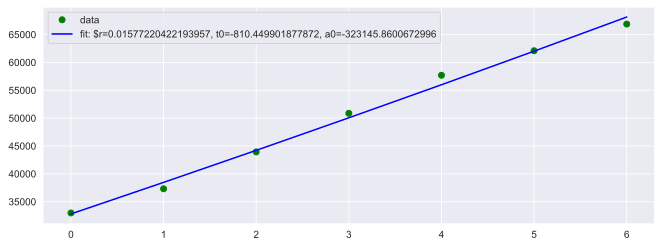

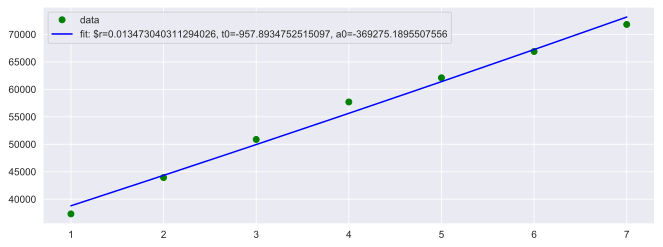

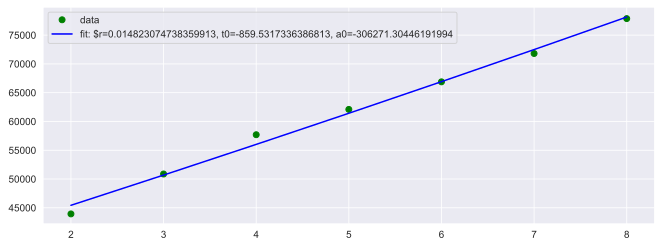

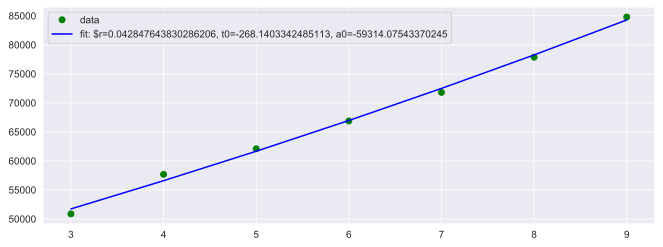

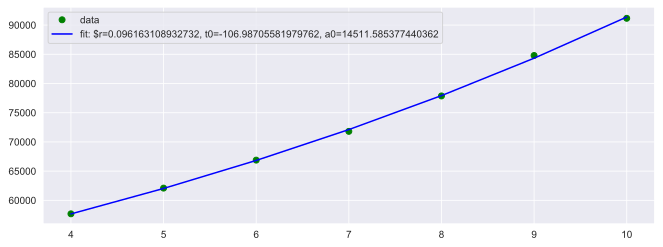

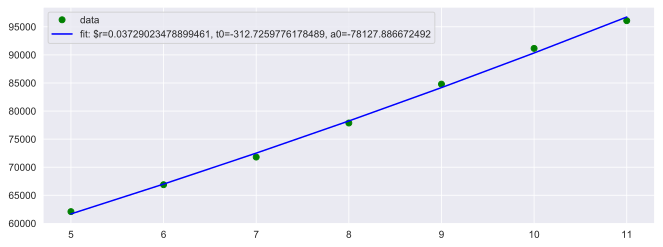

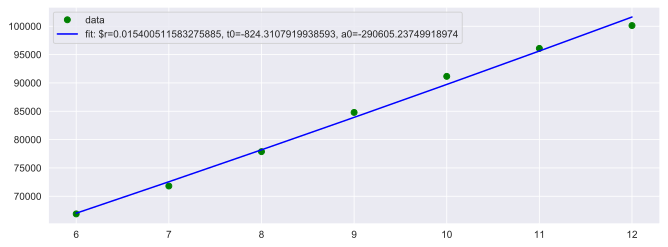

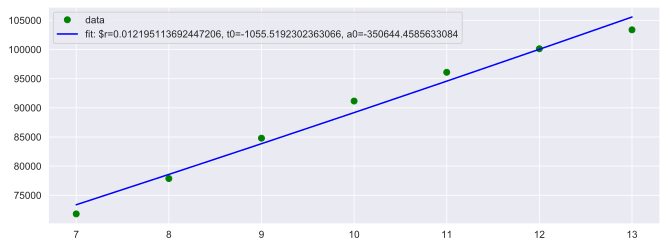

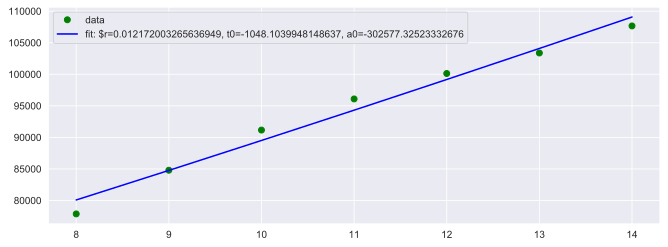

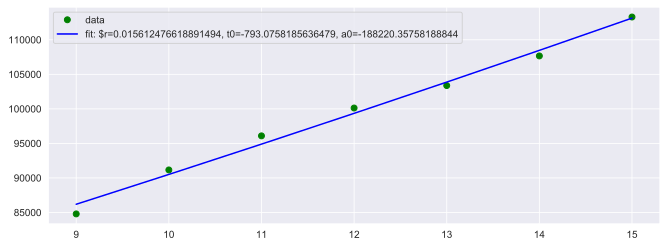

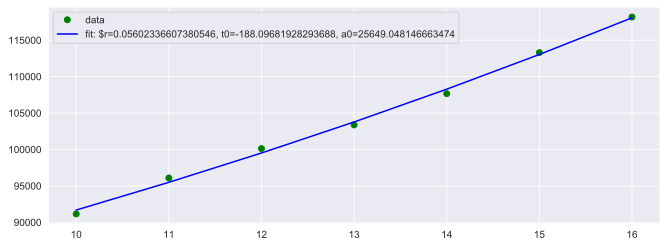

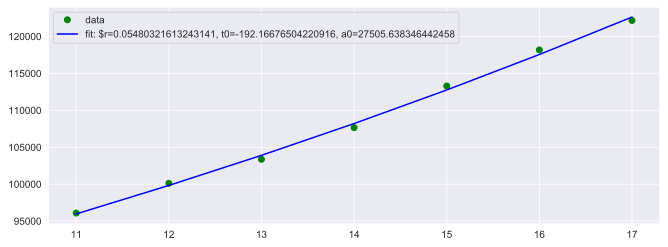

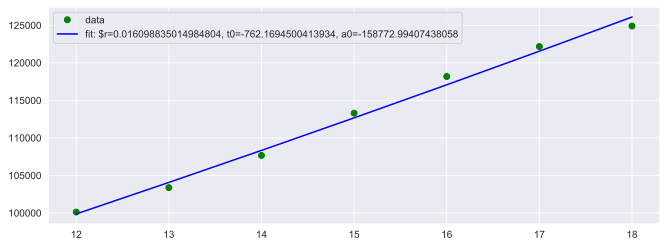

In [20]:
    
c = stack_country('Germany')
p_confirmed = grow_rate_n_days(c['confirmed'][-20:])
#

Data stack shape = (20,)
Working on 0 to 7, this is 0/20
reduced chi^2: 89979.0239781768
r   : 0.0154
t0  : -826
a0  : -2.75e+05

r=0.015430891143032078, t0=-826.3240992712538, a0=-275311.87528318097
Working on 1 to 8, this is 1/20
reduced chi^2: 186719.70881158742
r   : 0.0134
t0  : -958
a0  : -3.02e+05

r=0.013396667126829952, t0=-957.6277253042363, a0=-302251.7522399776
Working on 2 to 9, this is 2/20
reduced chi^2: 143495.46051513456
r   : 0.014
t0  : -905
a0  : -2.54e+05

r=0.014025082880118776, t0=-905.2560055295447, a0=-253916.2244102216
Working on 3 to 10, this is 3/20
reduced chi^2: 71513.88383690646
r   : 0.0155
t0  : -805
a0  : -1.98e+05

r=0.015547670877271817, t0=-805.0511319242455, a0=-198249.49557514954
Working on 4 to 11, this is 4/20
reduced chi^2: 13478.897328318382
r   : 0.0205
t0  : -593
a0  : -1.14e+05

r=0.020484879401687365, t0=-593.4119560681789, a0=-113548.16021807923
Working on 5 to 12, this is 5/20
reduced chi^2: 2917.1065902982364
r   : 0.0323
t0  : -359
a0 

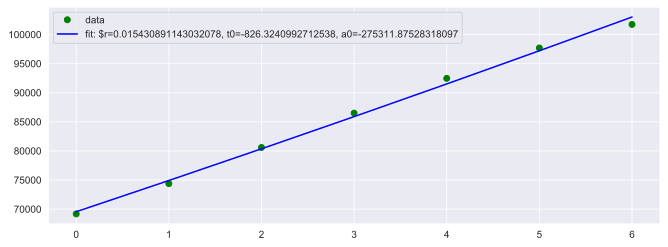

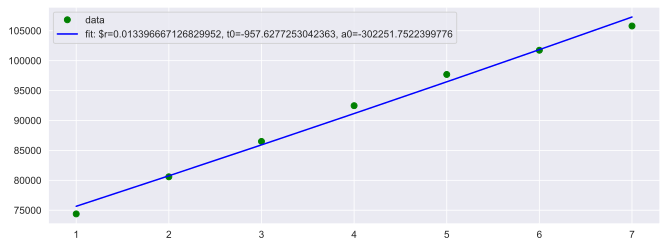

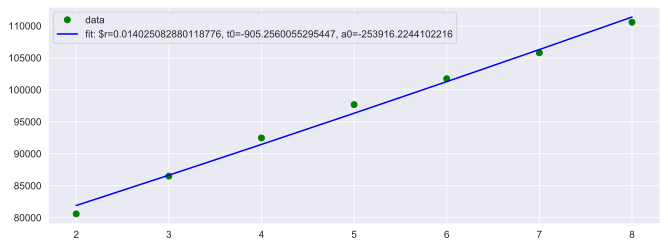

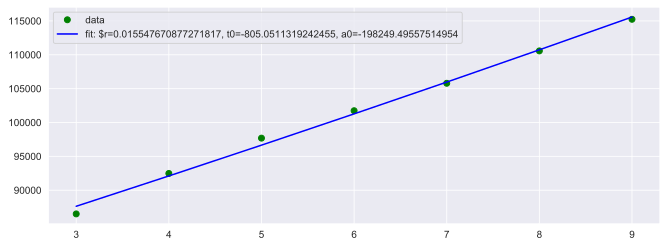

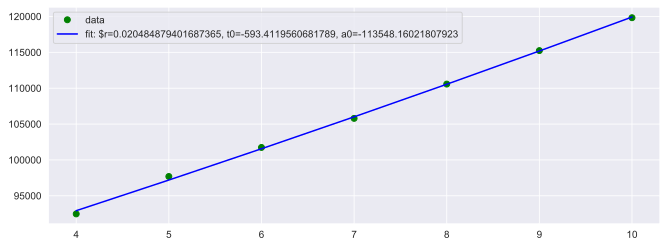

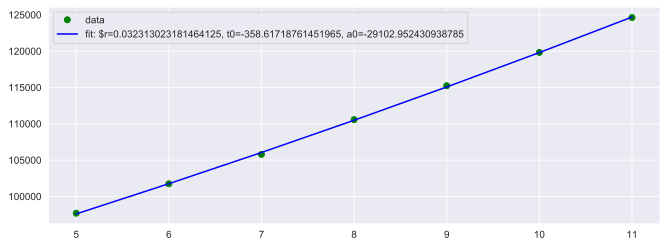

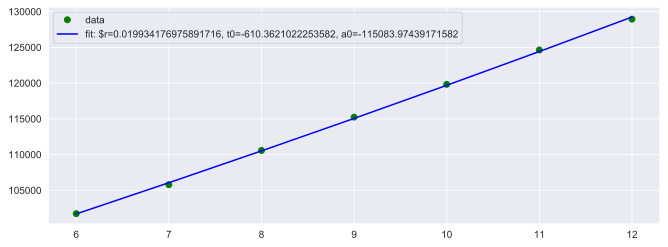

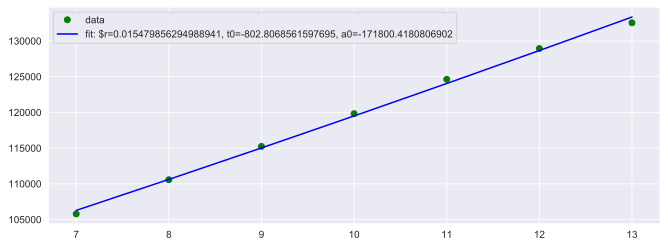

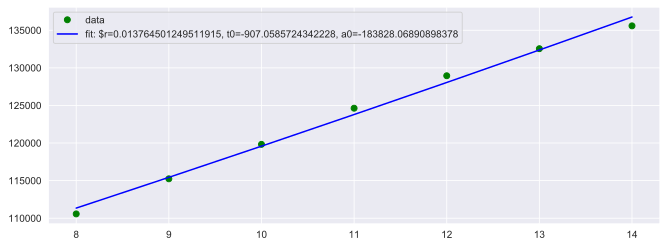

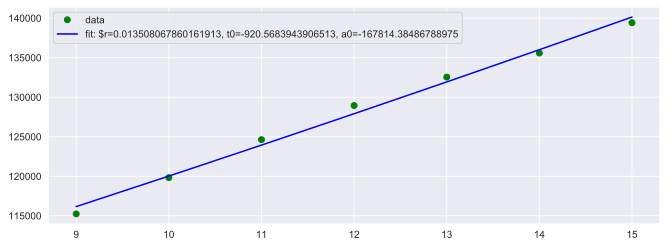

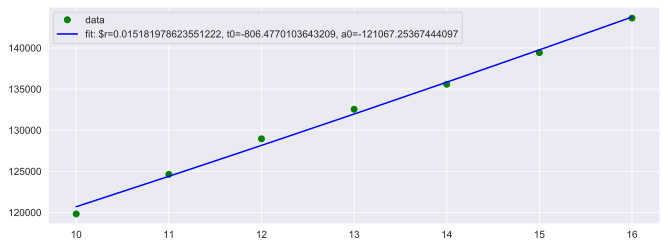

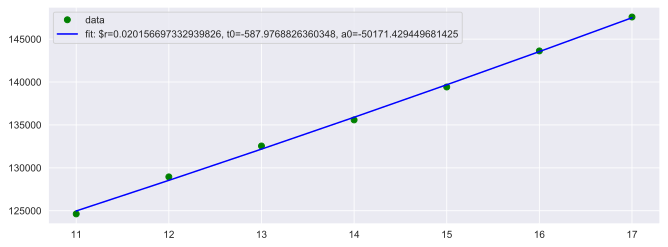

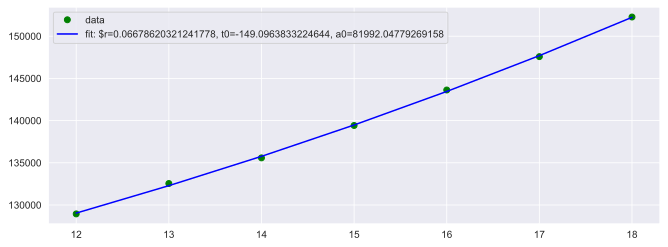

In [21]:
c = stack_country('Italy')
p_confirmed = grow_rate_n_days(c['confirmed'][-20:])

In [ ]:
c = stack_country('US')
p_confirmed = grow_rate_n_days(c['confirmed'][-20:])

Data stack shape = (20,)
Working on 0 to 7, this is 0/20
reduced chi^2: 161279.85217807099
r   : 0.0153
t0  : -858
a0  : -4.51e+05

r=0.015277108513418047, t0=-857.9782866085934, a0=-451059.7235593019
Working on 1 to 8, this is 1/20
reduced chi^2: 42046.42240086283
r   : 0.0185
t0  : -693
a0  : -3.39e+05

r=0.01853926187560938, t0=-693.3517906909934, a0=-339233.04322253494
Working on 2 to 9, this is 2/20
reduced chi^2: 13434.717071670975
r   : 0.0232
t0  : -543
a0  : -2.49e+05

r=0.023192671159774882, t0=-542.818091021094, a0=-249175.64831124182
Working on 3 to 10, this is 3/20
reduced chi^2: 5409.455289983518
r   : 0.0276
t0  : -449
a0  : -1.92e+05

r=0.027567349237227645, t0=-449.02815307867354, a0=-192365.1106656267
Working on 4 to 11, this is 4/20
reduced chi^2: 26046.212338924604
r   : 0.0205
t0  : -618
a0  : -2.83e+05

r=0.020544964895865846, t0=-618.1743577980682, a0=-282819.0941305467
Working on 5 to 12, this is 5/20
reduced chi^2: 70342.2925637518
r   : 0.0164
t0  : -788
a0  :

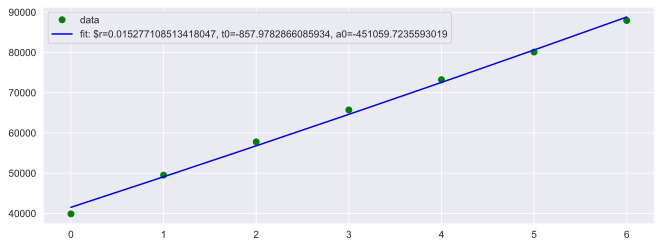

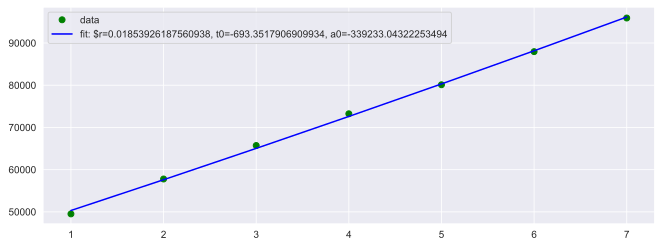

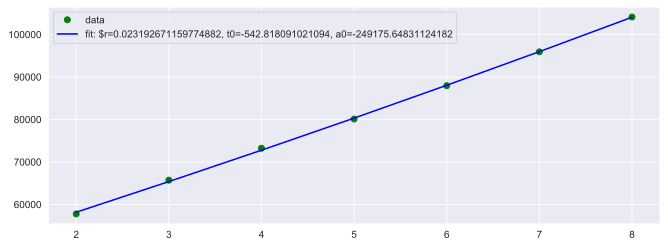

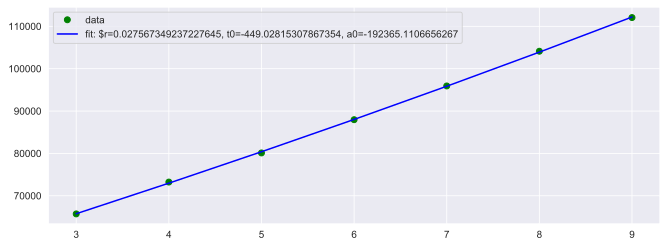

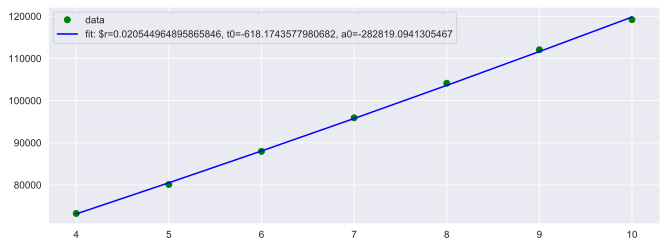

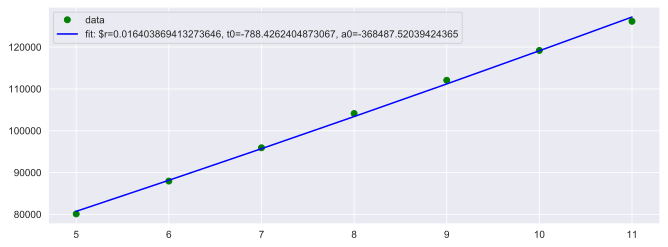

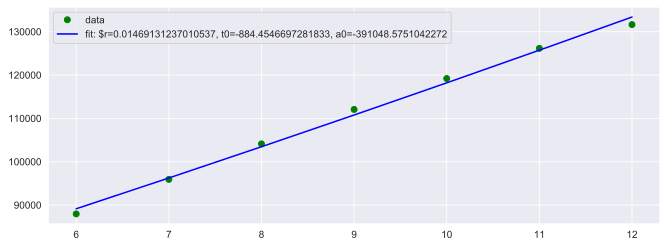

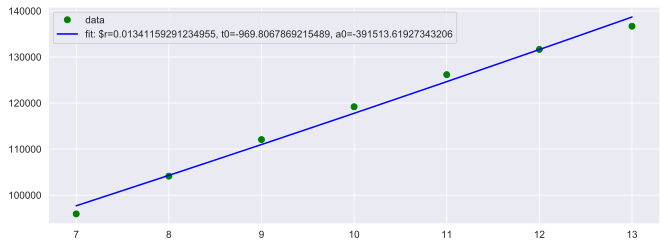

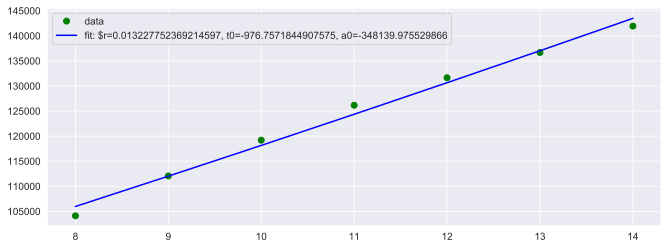

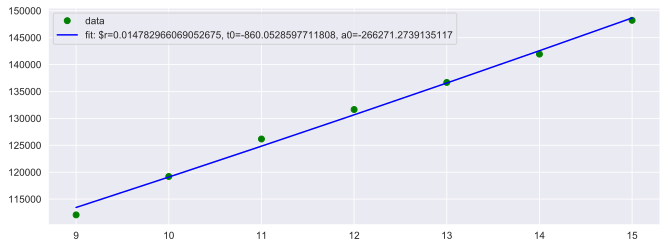

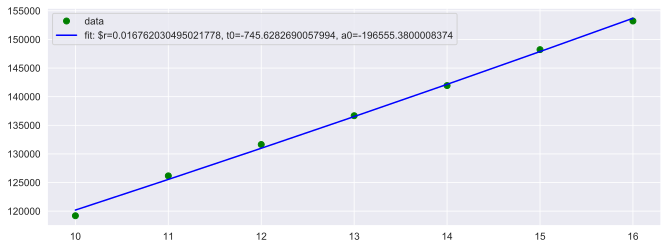

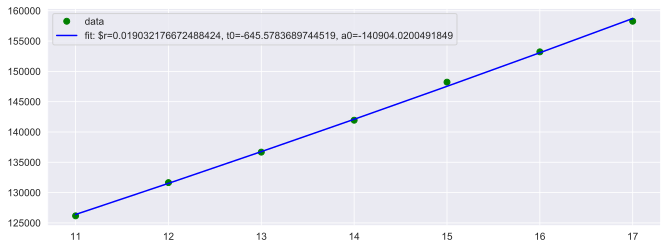

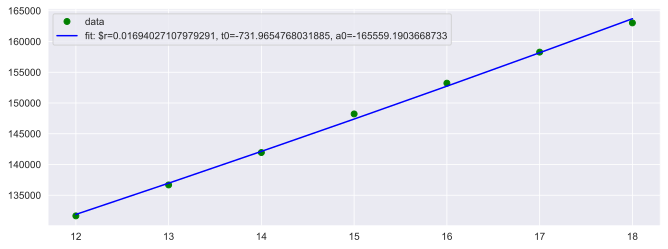

In [22]:
c = stack_country('Spain')
p_confirmed = grow_rate_n_days(c['confirmed'][-20:])

Data stack shape = (20,)
Working on 0 to 7, this is 0/20
reduced chi^2: 6.617208993027034e-07
r   : 0.000937
t0  : 6.11
a0  : 6.78e+04

r=0.000936959715935104, t0=6.105999630716135, a0=67800.00344278582
Working on 1 to 8, this is 1/20
reduced chi^2: 1.3673821308582253e-05
r   : -0.0014
t0  : 7.06
a0  : 6.78e+04

r=-0.0013986064288800844, t0=7.057105746489962, a0=67800.00409242738
Working on 2 to 9, this is 2/20
reduced chi^2: 2.830439396042905e-05
r   : 3.35
t0  : 8
a0  : 6.78e+04

r=3.3469507776527023, t0=8.000900484620315, a0=67800.99257455449
Working on 3 to 10, this is 3/20
reduced chi^2: 0.007126781771584182
r   : 0.537
t0  : 8.58
a0  : 6.78e+04

r=0.5366263063281667, t0=8.582901501176254, a0=67800.86248679861
Working on 4 to 11, this is 4/20
reduced chi^2: 0.009934136144686629
r   : 0.181
t0  : 6.27
a0  : 6.78e+04

r=0.18094520375155992, t0=6.2738161251024165, a0=67800.20993509873
Working on 5 to 12, this is 5/20
reduced chi^2: 0.01085611048837536
r   : 0.172
t0  : 4.58
a0  : 6.7

RuntimeError: exception was raised in user function
User function arguments:
     r = -169.569655
    t0 = +19.931790
    a0 = +67337.720874
Original python exception in user function:
OverflowError: (34, 'Result too large')
  File "<ipython-input-16-6349838f1c32>", line 19, in least_squares
    return sum((ydata - model(xdata, r, t0, a0))**2)/yvar


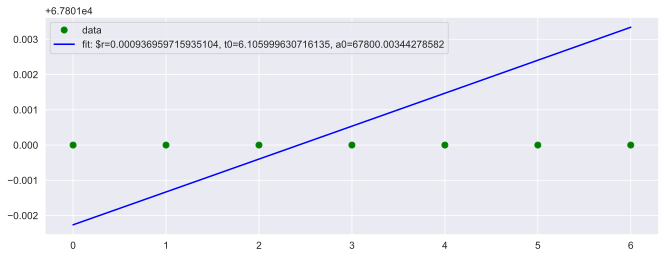

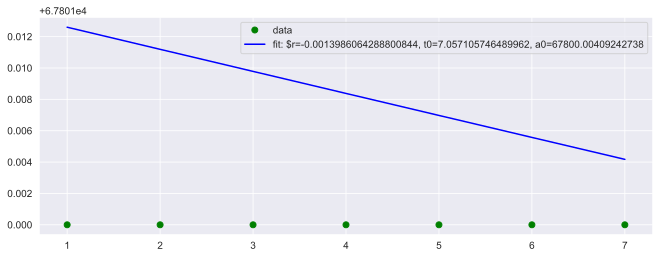

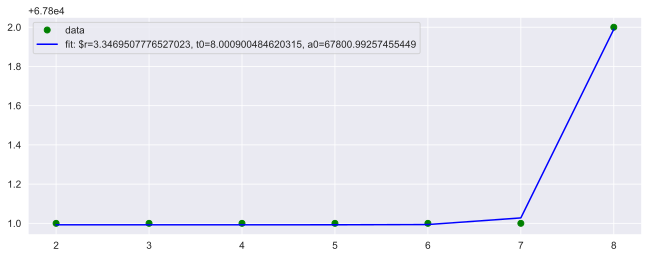

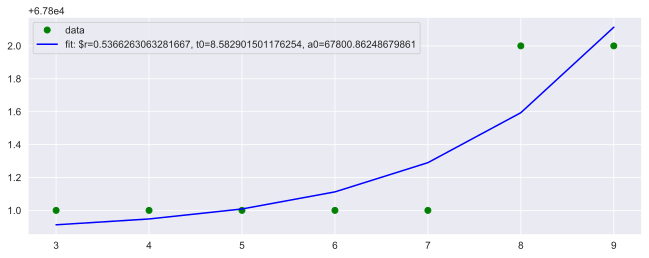

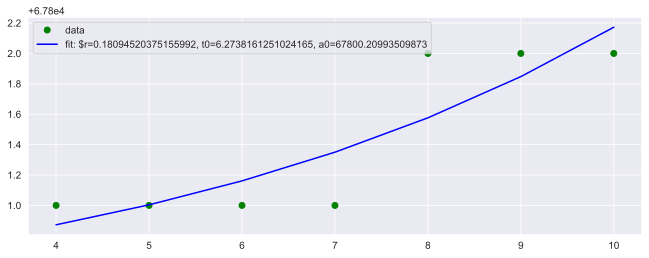

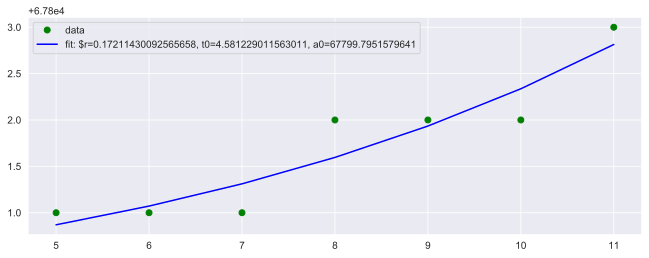

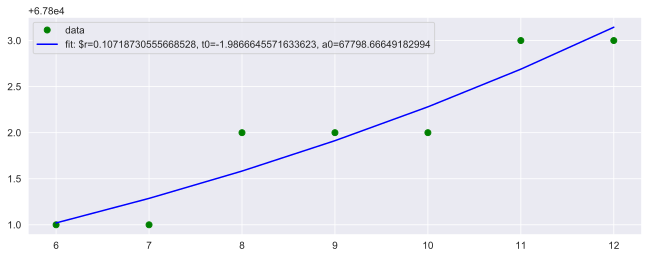

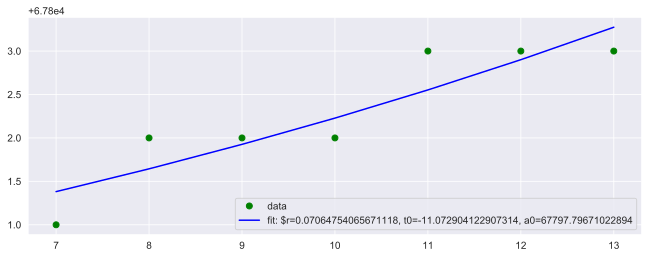

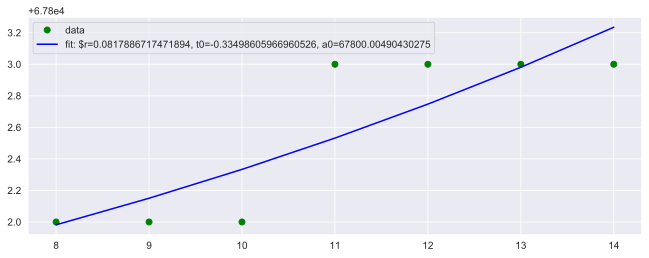

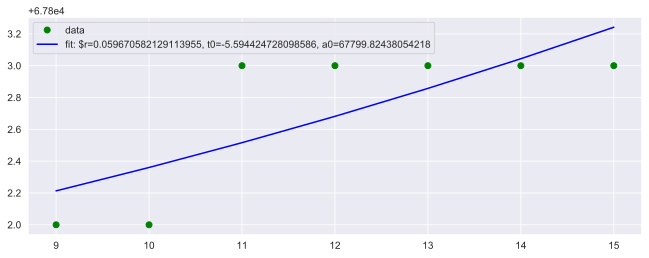

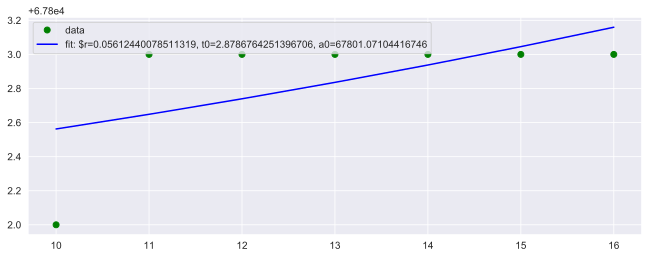

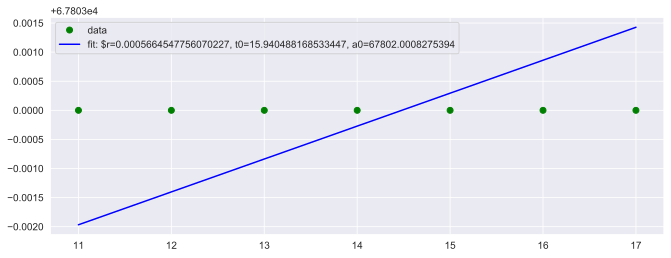

In [23]:
c = stack_country('China')
p_confirmed = grow_rate_n_days(c['confirmed'][-20:])

In [ ]:
p_confirmed.tail(n=10)

In [ ]:
p_confirmed['double_time'] = double_time(p_confirmed['r'])

In [ ]:
p_confirmed.tail(n=10)

Log basics ...

In [ ]:
ax0, ax1, ax2, ax3 = overview_plot(c)
ax2.plot(p_confirmed.index, p_confirmed['double_time'], 'xb', label='double time confirmed fit')


In [ ]:
from math import log 
log(2)/log(0.5)

From https://en.wikipedia.org/wiki/Doubling_time
    
$$\Delta t = (t_2 - t_1) * \left(\frac{\log(2)}{\log
    \left(\frac{f(t_2)}{f(t_1)}\right)}\right)$$

In [ ]:
from math import log
def double_time_exponential2(t1, t2, q1, q2):
    return (t2 - t1) * (log(2) / log(q2/q1) )

def growth_rate2(double_time):
    return log(2)/double_time


t1, t2, q1, q2 = 0, 1, 1, 2
double_time_exponential2(t1, t2, q1, q2), growth_rate2(double_time_exponential2(t1, t2, q1, q2) )

In [ ]:
2**(1/double_time_exponential2(0, 1, 1, 21))

In [ ]:
2/math.exp(1)

In [ ]:
math.exp(0.5)/2

In [ ]:
math.exp(0.6931471805599453*4)

In [ ]:
def logplots(c, columns, ax=None, alpha=0.7):
    """Dataframe c with colunmname 'column' contains the data we are interested in.
    """
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 8))
        ax = ax
        ax.set_xscale('log')
        ax.set_yscale('log')
    else:
        pass
    
    for col in columns:
        assert col in c.columns
        c2 = c.copy()
        c2['change'] = c2[col].diff()
    
        ax.plot(c2[col], c2['change'], '-o', label=c.country + " " + col, alpha=alpha) 
    
    ax.legend()
    ax.set_xlabel("total numbers")
    ax.set_ylabel("daily change in numbers")
    return ax

    
    
c = stack_country("Germany")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()
c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'])

c = stack_country("China")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()
c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'], ax=ax)

c = stack_country("Italy")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()
c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'], ax=ax)

c = stack_country("Spain")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()
c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'], ax=ax)

c = stack_country("US")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()
c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'], ax=ax)

c = stack_country("India")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()

c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'], ax=ax)


In [ ]:
c

In [ ]:
confirmed.loc['Germany']

In [24]:
deaths.loc['Germany']

Province/State          NaN
2020-01-22 00:00:00       0
2020-01-23 00:00:00       0
2020-01-24 00:00:00       0
2020-01-25 00:00:00       0
                       ... 
2020-04-08 00:00:00    2349
2020-04-09 00:00:00    2607
2020-04-10 00:00:00    2767
2020-04-11 00:00:00    2736
2020-04-12 00:00:00    3022
Name: Germany, Length: 83, dtype: object

In [25]:
confirmed.loc['US']

Province/State            NaN
2020-01-22 00:00:00         1
2020-01-23 00:00:00         1
2020-01-24 00:00:00         2
2020-01-25 00:00:00         2
                        ...  
2020-04-08 00:00:00    429052
2020-04-09 00:00:00    461437
2020-04-10 00:00:00    496535
2020-04-11 00:00:00    526396
2020-04-12 00:00:00    555313
Name: US, Length: 83, dtype: object

In [26]:
deaths.loc['US']

Province/State           NaN
2020-01-22 00:00:00        0
2020-01-23 00:00:00        0
2020-01-24 00:00:00        0
2020-01-25 00:00:00        0
                       ...  
2020-04-08 00:00:00    14695
2020-04-09 00:00:00    16478
2020-04-10 00:00:00    18586
2020-04-11 00:00:00    20463
2020-04-12 00:00:00    22020
Name: US, Length: 83, dtype: object

In [27]:
confirmed.loc['China']

Province/State  2020-01-22 00:00:00  2020-01-23 00:00:00  \
Country/Region                                                             
China                    Anhui                    1                    9   
China                  Beijing                   14                   22   
China                Chongqing                    6                    9   
China                   Fujian                    1                    5   
China                    Gansu                    0                    2   
China                Guangdong                   26                   32   
China                  Guangxi                    2                    5   
China                  Guizhou                    1                    3   
China                   Hainan                    4                    5   
China                    Hebei                    1                    1   
China             Heilongjiang                    0                    2   
China                    Henan                    5                    5   
China                Hong Kong                    0                    2   
China                    Hubei                  444                  444   
China                    Hunan                    4                    9   
China           Inner Mongolia                    0                    0   
China                  Jiangsu                    1                    5   
China                  Jiangxi                    2                    7   
China                    Jilin                    0                    1   
China                 Liaoning                    2                    3   
China                    Macau                    1                    2   
China                  Ningxia                    1                    1   
China                  Qinghai                    0                    0   
China                  Shaanxi                    0                    3   
China                 Shandong                    2                    6   
China                 Shanghai                    9                   16   
China                   Shanxi                    1                    1   
China                  Sichuan                    5                    8   
China                  Tianjin                    4                    4   
China                    Tibet                    0                    0   
China                 Xinjiang                    0                    2   
China                   Yunnan                    1                    2   
China                 Zhejiang                   10                   27   

                2020-01-24 00:00:00  2020-01-25 00:00:00  2020-01-26 00:00:00  \
Country/Region                                                                  
China                            15                   39                   60   
China                            36                   41                   68   
China                            27                   57                   75   
China                            10                   18                   35   
China                             2                    4                    7   
China                            53                   78                  111   
China                            23                   23                   36   
China                             3                    4                    5   
China                             8                   19                   22   
China                             2                    8                   13   
China                             4                    9                   15   
China                             9                   32                   83   
China                             2                    5                    8   
China                           549                  761                 1058   
China                            24                   43   

In [28]:
deaths.loc['China']

Province/State  2020-01-22 00:00:00  2020-01-23 00:00:00  \
Country/Region                                                             
China                    Anhui                    0                    0   
China                  Beijing                    0                    0   
China                Chongqing                    0                    0   
China                   Fujian                    0                    0   
China                    Gansu                    0                    0   
China                Guangdong                    0                    0   
China                  Guangxi                    0                    0   
China                  Guizhou                    0                    0   
China                   Hainan                    0                    0   
China                    Hebei                    0                    1   
China             Heilongjiang                    0                    0   
China                    Henan                    0                    0   
China                Hong Kong                    0                    0   
China                    Hubei                   17                   17   
China                    Hunan                    0                    0   
China           Inner Mongolia                    0                    0   
China                  Jiangsu                    0                    0   
China                  Jiangxi                    0                    0   
China                    Jilin                    0                    0   
China                 Liaoning                    0                    0   
China                    Macau                    0                    0   
China                  Ningxia                    0                    0   
China                  Qinghai                    0                    0   
China                  Shaanxi                    0                    0   
China                 Shandong                    0                    0   
China                 Shanghai                    0                    0   
China                   Shanxi                    0                    0   
China                  Sichuan                    0                    0   
China                  Tianjin                    0                    0   
China                    Tibet                    0                    0   
China                 Xinjiang                    0                    0   
China                   Yunnan                    0                    0   
China                 Zhejiang                    0                    0   

                2020-01-24 00:00:00  2020-01-25 00:00:00  2020-01-26 00:00:00  \
Country/Region                                                                  
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             1                    1                    1   
China                             1                    1                    1   
China                             0                    0                    1   
China                             0                    0                    0   
China                            24                   40                   52   
China                             0                    0   

In [29]:
confirmed.loc['Italy']

Province/State            NaN
2020-01-22 00:00:00         0
2020-01-23 00:00:00         0
2020-01-24 00:00:00         0
2020-01-25 00:00:00         0
                        ...  
2020-04-08 00:00:00    139422
2020-04-09 00:00:00    143626
2020-04-10 00:00:00    147577
2020-04-11 00:00:00    152271
2020-04-12 00:00:00    156363
Name: Italy, Length: 83, dtype: object

In [30]:
deaths.loc['Italy']

Province/State           NaN
2020-01-22 00:00:00        0
2020-01-23 00:00:00        0
2020-01-24 00:00:00        0
2020-01-25 00:00:00        0
                       ...  
2020-04-08 00:00:00    17669
2020-04-09 00:00:00    18279
2020-04-10 00:00:00    18849
2020-04-11 00:00:00    19468
2020-04-12 00:00:00    19899
Name: Italy, Length: 83, dtype: object

In [31]:
confirmed.loc['Spain']

Province/State            NaN
2020-01-22 00:00:00         0
2020-01-23 00:00:00         0
2020-01-24 00:00:00         0
2020-01-25 00:00:00         0
                        ...  
2020-04-08 00:00:00    148220
2020-04-09 00:00:00    153222
2020-04-10 00:00:00    158273
2020-04-11 00:00:00    163027
2020-04-12 00:00:00    166831
Name: Spain, Length: 83, dtype: object

In [32]:
deaths.loc['Spain']

Province/State           NaN
2020-01-22 00:00:00        0
2020-01-23 00:00:00        0
2020-01-24 00:00:00        0
2020-01-25 00:00:00        0
                       ...  
2020-04-08 00:00:00    14792
2020-04-09 00:00:00    15447
2020-04-10 00:00:00    16081
2020-04-11 00:00:00    16606
2020-04-12 00:00:00    17209
Name: Spain, Length: 83, dtype: object

In [33]:
confirmed.loc['India']

Province/State          NaN
2020-01-22 00:00:00       0
2020-01-23 00:00:00       0
2020-01-24 00:00:00       0
2020-01-25 00:00:00       0
                       ... 
2020-04-08 00:00:00    5916
2020-04-09 00:00:00    6725
2020-04-10 00:00:00    7598
2020-04-11 00:00:00    8446
2020-04-12 00:00:00    9205
Name: India, Length: 83, dtype: object

In [34]:
deaths.loc['India']

Province/State         NaN
2020-01-22 00:00:00      0
2020-01-23 00:00:00      0
2020-01-24 00:00:00      0
2020-01-25 00:00:00      0
                      ... 
2020-04-08 00:00:00    178
2020-04-09 00:00:00    226
2020-04-10 00:00:00    246
2020-04-11 00:00:00    288
2020-04-12 00:00:00    331
Name: India, Length: 83, dtype: object